In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
from matplotlib import transforms
import networkx as nx
from matplotlib.gridspec import GridSpec
import cooler


import os
import sys
from importlib import reload

# local imports 
import filters
import pore_c_utils as pcu
import binning_utils as binning
import plotting as hicPlot

In [2]:
dirpath = "/nfs/turbo/umms-indikar/shared/tools/Pore-C-Snakemake/results_ES5to12/contacts/"
cellNums = [1, 2, 4, 5, 6, 7] # dropping cell 3 due to sparsity
filetags = [f"run0{x}" for x in cellNums]

# filetags = [f"run0{x}" for x in range(1, 2)]

assembly = pcu.loadAssembly("GRCm39_Assembly.txt")
rawCells = pcu.loadRawContactDirectory(dirpath, filetags)
print(f"{rawCells.keys()=}")

runId='run01' df.shape=(13386738, 38)
runId='run02' df.shape=(13046898, 38)
runId='run04' df.shape=(20486346, 38)
runId='run05' df.shape=(5043403, 38)
runId='run06' df.shape=(7310826, 38)
runId='run07' df.shape=(10525887, 38)
rawCells.keys()=dict_keys(['run01', 'run02', 'run04', 'run05', 'run06', 'run07'])


In [3]:
reload(pcu)
reload(binning)
reload(filters)

filteredCells = filters.runAllFilters(rawCells,
                              assembly,
                              adjacent=False,
                              chromosome=None, 
                              verbose=True)  

print(f"{filteredCells.keys()=}")

------------------------------
runId='run01'
cf.shape=(146231, 64)
-- -- --
Total Reads 43664 (1.000)
Singletons 19218 (0.440)
Pairs 8120 (0.186)
Multiway 16326 (0.374)
-- -- --
Total Contacts 146231 (1.000)
cis Contacts 133926 (0.916)
trans Contacts 12305 (0.084)
-- -- --
Total Contacts 146231 (1.000)
Direct Contacts 52876 (0.362)
Indirect Contacts 93355 (0.638)

------------------------------
runId='run02'
cf.shape=(72884, 64)
-- -- --
Total Reads 22279 (1.000)
Singletons 9847 (0.442)
Pairs 4282 (0.192)
Multiway 8150 (0.366)
-- -- --
Total Contacts 72884 (1.000)
cis Contacts 65612 (0.900)
trans Contacts 7272 (0.100)
-- -- --
Total Contacts 72884 (1.000)
Direct Contacts 26077 (0.358)
Indirect Contacts 46807 (0.642)

------------------------------
runId='run04'
cf.shape=(89907, 64)
-- -- --
Total Reads 26553 (1.000)
Singletons 11259 (0.424)
Pairs 5323 (0.200)
Multiway 9971 (0.376)
-- -- --
Total Contacts 89907 (1.000)
cis Contacts 78737 (0.876)
trans Contacts 11170 (0.124)
-- -- --
Tot

In [4]:
reload(pcu)
reload(binning)

resolution = 1000000 # 1mb scale

totalLength = assembly['chromEnd'].max()
bins = binning.getBins(totalLength, resolution)

label1 = 'bin1'
label2 = 'bin2'


binnedData = {}
matrices = {}

for runId, data in filteredCells.items():
    print(f"{runId=}")
    
    binned = binning.wholeGenomeBinData(data, bins, label1, label2)
    binnedData[runId] = binned
      
    A = pcu.getHic(binned, bins, label1, label2)
    print(f"{A.shape=}")
    matrices[runId] = A
    print()
    
print(f"{matrices.keys()}")

runId='run01'
A.shape=(2724, 2724)

runId='run02'
A.shape=(2724, 2724)

runId='run04'
A.shape=(2724, 2724)

runId='run05'
A.shape=(2724, 2724)

runId='run06'
A.shape=(2724, 2724)

runId='run07'
A.shape=(2724, 2724)

dict_keys(['run01', 'run02', 'run04', 'run05', 'run06', 'run07'])


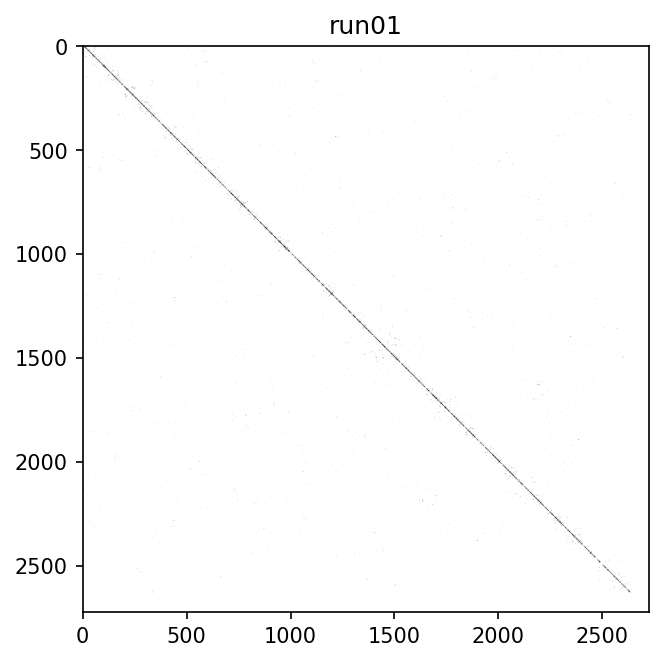

In [34]:
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = 5, 5
    
for runId, A in matrices.items():
    
    Abinary = np.where(A > 0, 1, 0)
    
    plt.imshow(Abinary, cmap='binary')
    plt.title(runId)
    plt.show()
    break

In [15]:
chromOrder = ['chr1',
 'chr2',
 'chr3',
 'chr4',
 'chr5',
 'chr6',
 'chr7',
 'chr8',
 'chr9',
 'chr10',
 'chr11',
 'chr12',
 'chr13',
 'chr14',
 'chr15',
 'chr16',
 'chr17',
 'chr18',
 'chr19',
 'chrX',
 'chrY']

In [17]:
reload(pcu)

scHICfilepath = f"/nfs/turbo/umms-indikar/shared/projects/poreC/nagano_2017_data/nagano_1MB_raw_BALANCED.scool"
cellList = list(cooler.fileops.list_coolers(scHICfilepath))
print(len(cellList))

3882


In [25]:
sampleSize = 6
sample = np.random.choice(cellList, sampleSize, replace=False)

hic = {}

for s in sample:
    filetag = "_".join(s.split("_")[0:2]).replace("/", "")    
    A, chromInfo, hicIndex = pcu.loadNagano2017SingleCell(scHICfilepath, s, chromOrder, balance=False)
    
    # reindex the matrix
    A = A[hicIndex, :][:, hicIndex]
    print(f"{filetag=} {A.shape=}")
    
    hic[filetag] = A

hic.keys()

filetag='Diploid_19' A.shape=(2665, 2665)
filetag='Diploid_26' A.shape=(2665, 2665)
filetag='Diploid_7' A.shape=(2665, 2665)
filetag='Diploid_12' A.shape=(2665, 2665)
filetag='Diploid_9' A.shape=(2665, 2665)
filetag='Diploid_35' A.shape=(2665, 2665)


dict_keys(['Diploid_19', 'Diploid_26', 'Diploid_7', 'Diploid_12', 'Diploid_9', 'Diploid_35'])

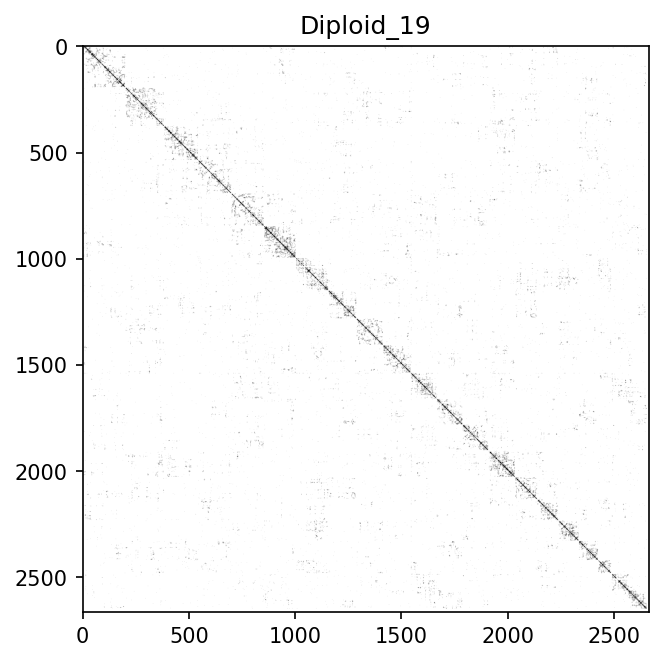

In [35]:
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = 5, 5

for runId, A in hic.items():
    
    Abinary = np.where(A > 0, 1, 0)
    plt.imshow(Abinary, cmap='binary')
    plt.title(runId)
    plt.show()
    break

In [5]:
# # get the binned chromosome positions
# chromBins = {}

# for idx, row in assembly.iterrows():
#     chromBin = binning.returnBin(row['chromEnd'], bins)
#     chromBins[row['Chromosome']] = chromBin
    
# del chromBins['Y']

# print('done.')  

done.


In [6]:
# reload(hicPlot)

# plt.rcParams['figure.dpi'] = 200
# plt.rcParams['figure.figsize'] = 10, 10
    
# for runId, contactsDf in binnedData.items():
    
#     hicPlot.genomewidePlot(contactsDf, bins, chromBins, label1, label2)
#     plt.title(runId, fontsize=20)
#     plt.show()
    

In [13]:
# reload(hicPlot)

# plt.rcParams['figure.dpi'] = 200
# plt.rcParams['figure.figsize'] = 5, 5
    
# for runId, A in matrices.items():
    
#     Abinary = np.where(A > 0, 1, 0)
    
#     plt.imshow(Abinary, cmap='binary')
#     plt.title(runId)
#     plt.show()

In [8]:
# threshold = 0.5

# plt.rcParams['figure.dpi'] = 200
# plt.rcParams['figure.figsize'] = 10, 10

# imputedContacts = {}

# for runId, A in matrices.items():
    
#     G = nx.from_numpy_array(A)    
#     P = np.zeros(A.shape)

#     pLink = nx.common_neighbor_centrality(G, alpha=0.1)
    
#     for i, j, p in pLink:
#         P[i, j] = P[i, j] + p
#         P[j, i] = P[j, i] + p
    
#     # normalize the link scores
#     P = P / P.max()
    
#     # threshold based prediction
#     P = np.where(P >= threshold, 1, 0)
    
#     # impute new contacts
#     imputedA = A + P
#     imputedContacts[runId] = imputedA
    
#     fig, ax = plt.subplots(1, 3) 
    
#     ax[0].matshow(A)
#     ax[0].set_title('Original Contacts', y=1.1)
    
#     ax[1].matshow(P)
#     ax[1].set_title('Predicted Contacts', y=1.1)
    
#     ax[2].matshow(imputedA)
#     ax[2].set_title('Imputed Contacts', y=1.1)
    
#     plt.suptitle(runId, y=0.7)
#     plt.axis(False)
#     plt.show()

In [9]:
# imputedBulk = np.zeros((matrices['run01'].shape))

# for key, imp in imputedContacts.items():
#     imputedBulk += imp

# plt.rcParams['figure.dpi'] = 200
# plt.rcParams['figure.figsize'] = 5, 5

# plt.matshow(np.log(imputedBulk), cmap='plasma')
# plt.title('imputed psuedo bulk')
# plt.colorbar(fraction=0.046, pad=0.04)

In [10]:
scHICfilepath = f"/nfs/turbo/umms-indikar/shared/projects/poreC/nagano_2017_data/nagano_1MB_raw_BALANCED.scool"
cellList = list(cooler.fileops.list_coolers(scHICfilepath))

sampleSize = 6 # sample 6 randomly
sample = np.random.choice(cellList, sampleSize, replace=False)

hiC = {}

for s in sample:
    filetag = "_".join(s.split("_")[0:2]).replace("/", "")

    clr = cooler.Cooler(f"{scHICfilepath}::{s}")
    
    hiC[filetag] = clr
    
hiC.keys()

dict_keys(['Diploid_22', 'Diploid_23', 'Diploid_4', 'Diploid_32', 'Diploid_20', 'Diploid_34'])

------------------------
pKey='run01'
hKey='Diploid_22'


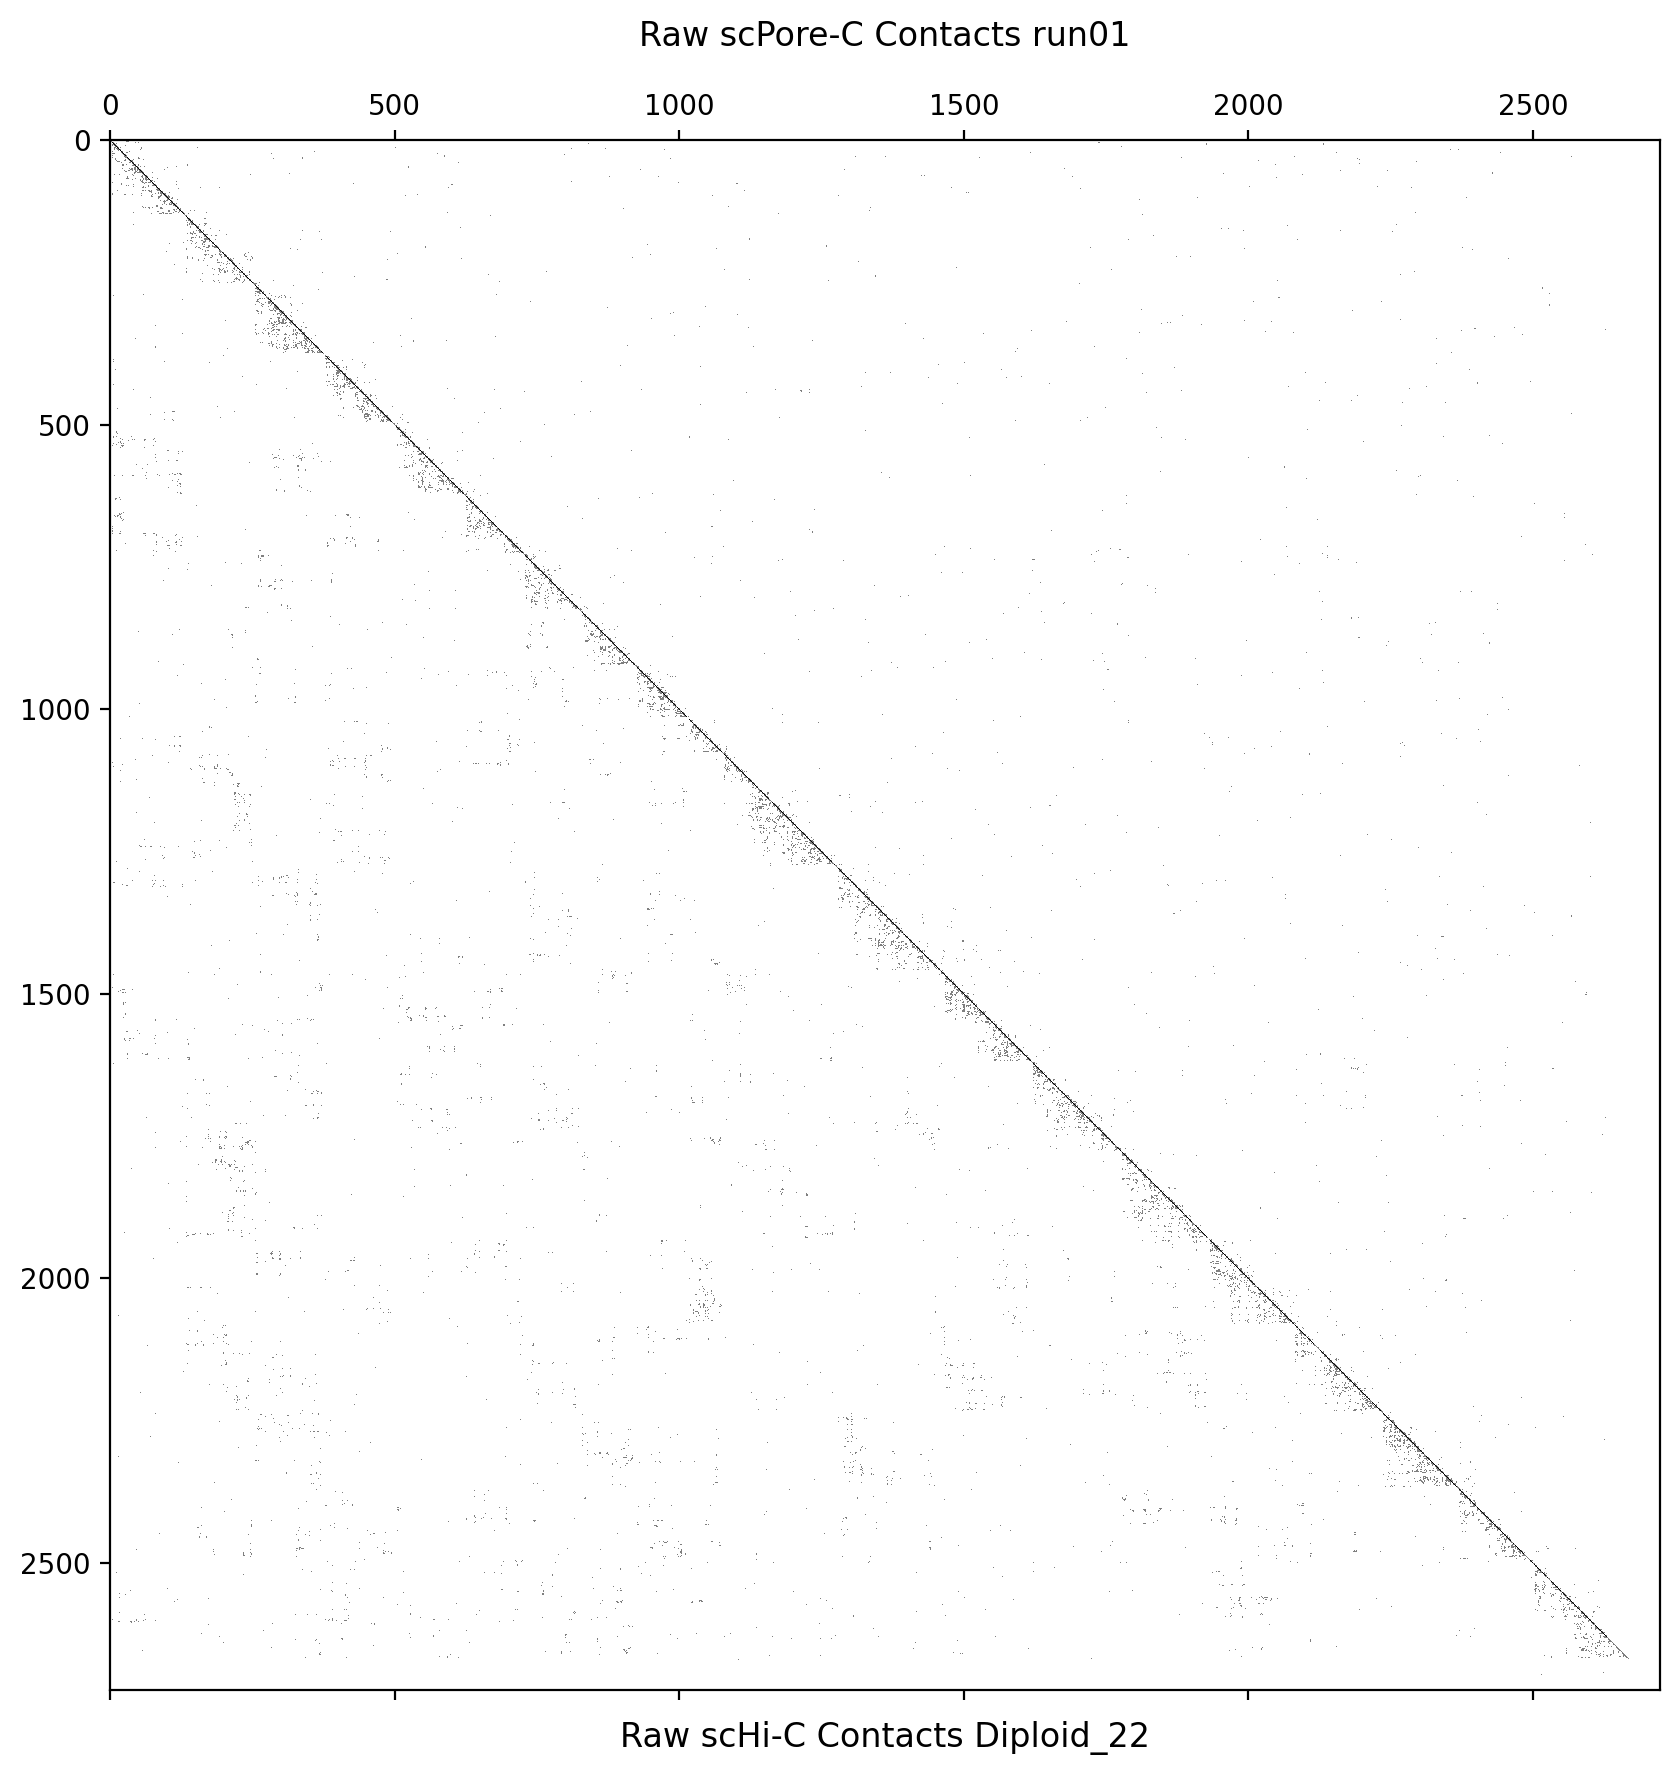

------------------------
pKey='run02'
hKey='Diploid_23'


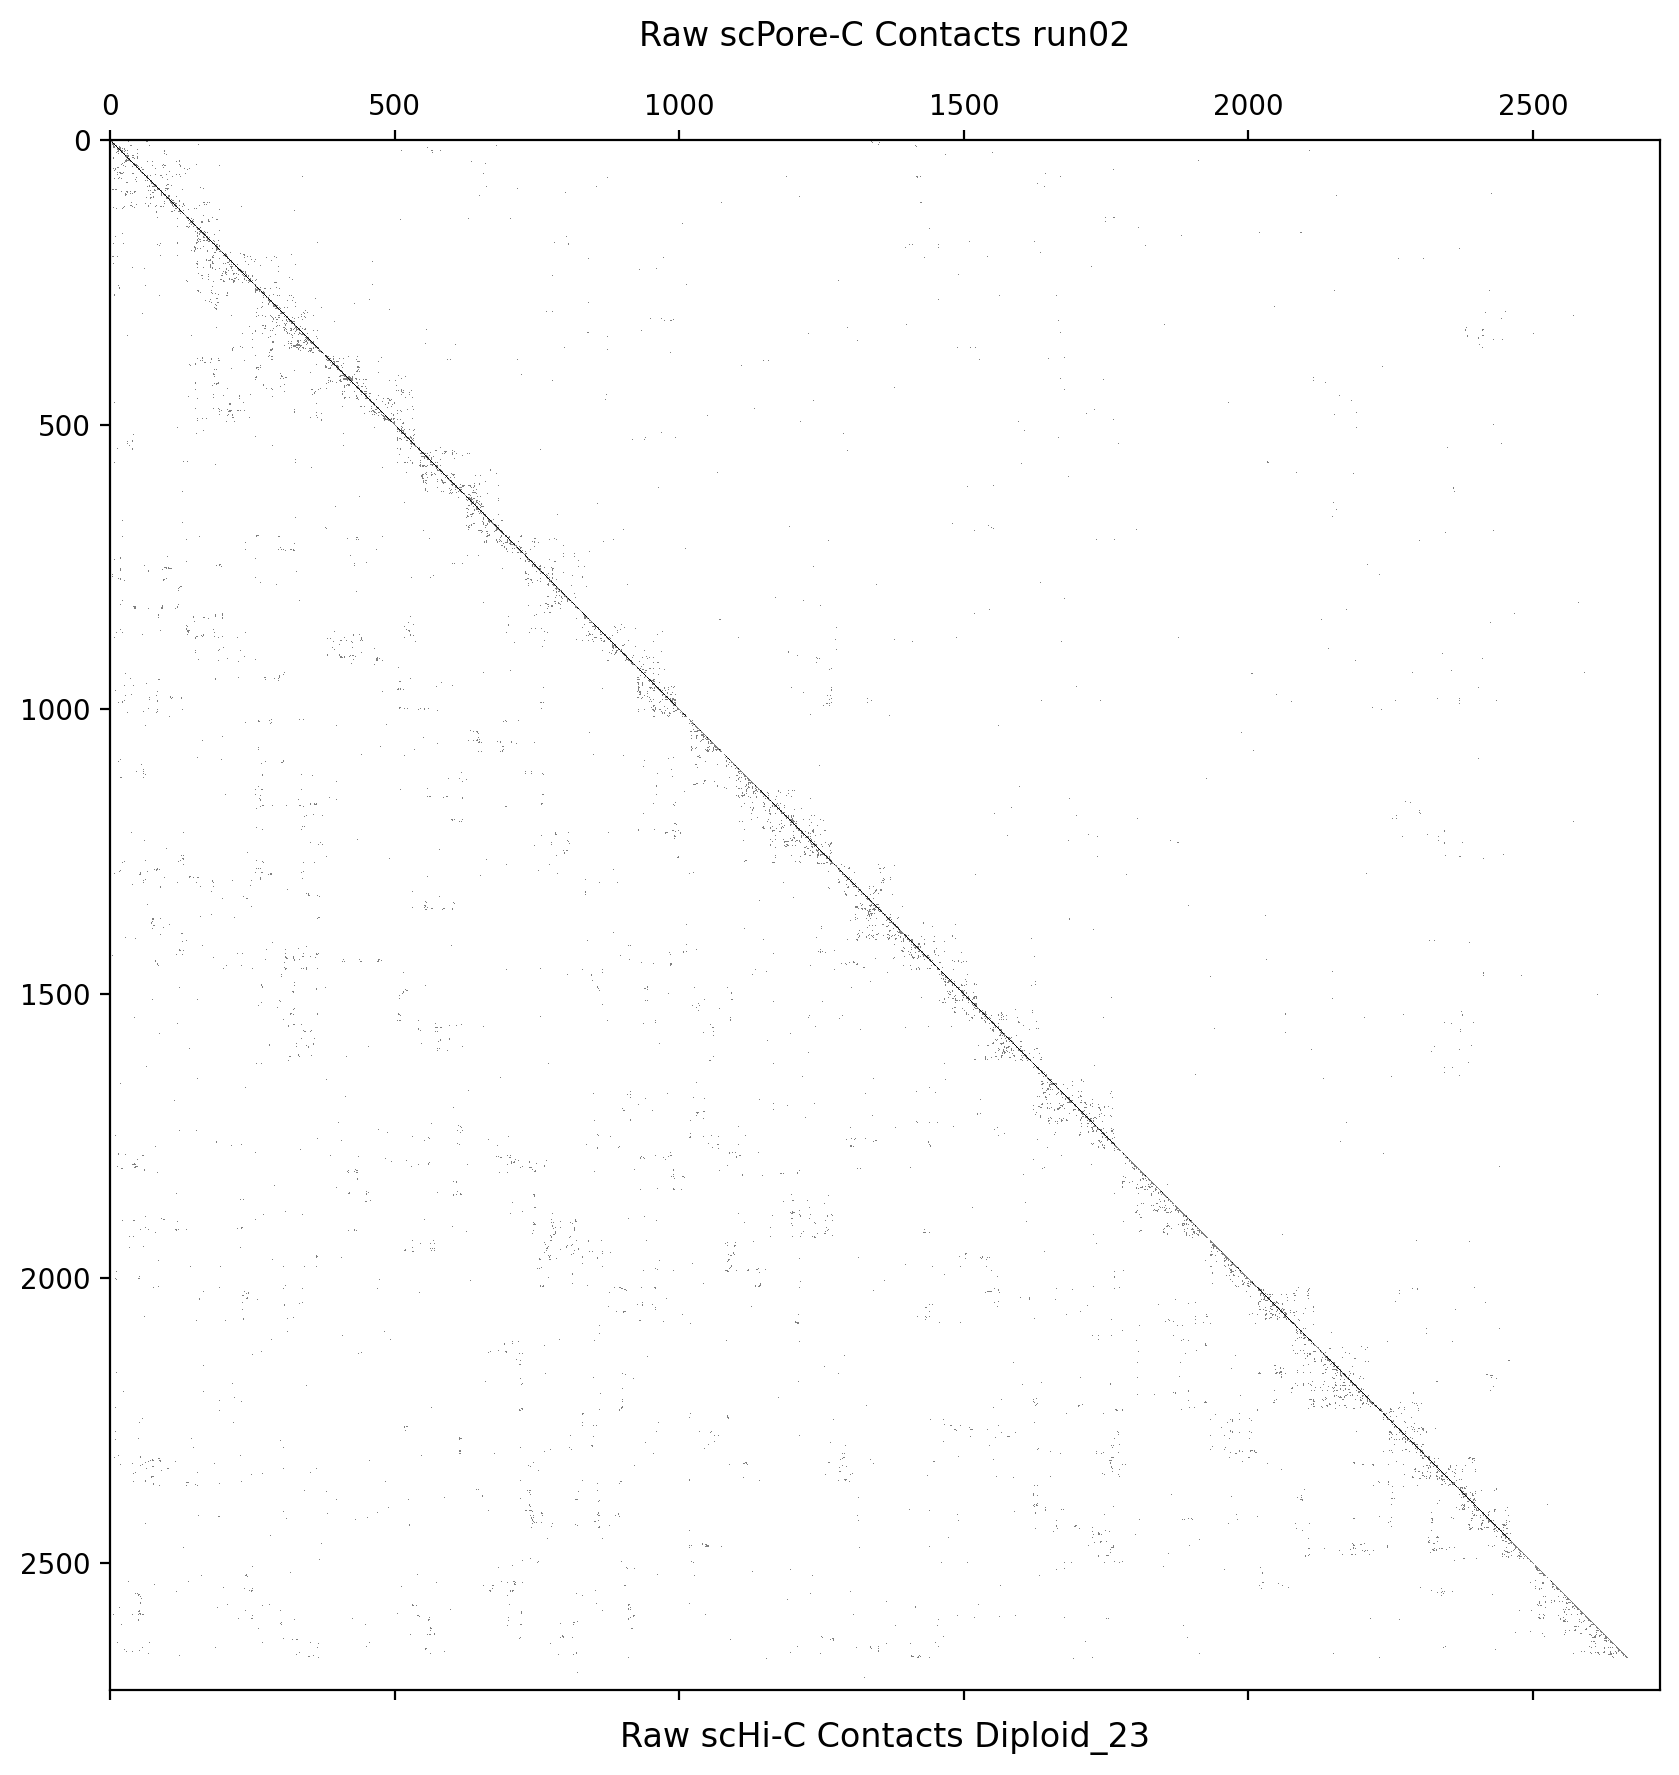

------------------------
pKey='run04'
hKey='Diploid_4'


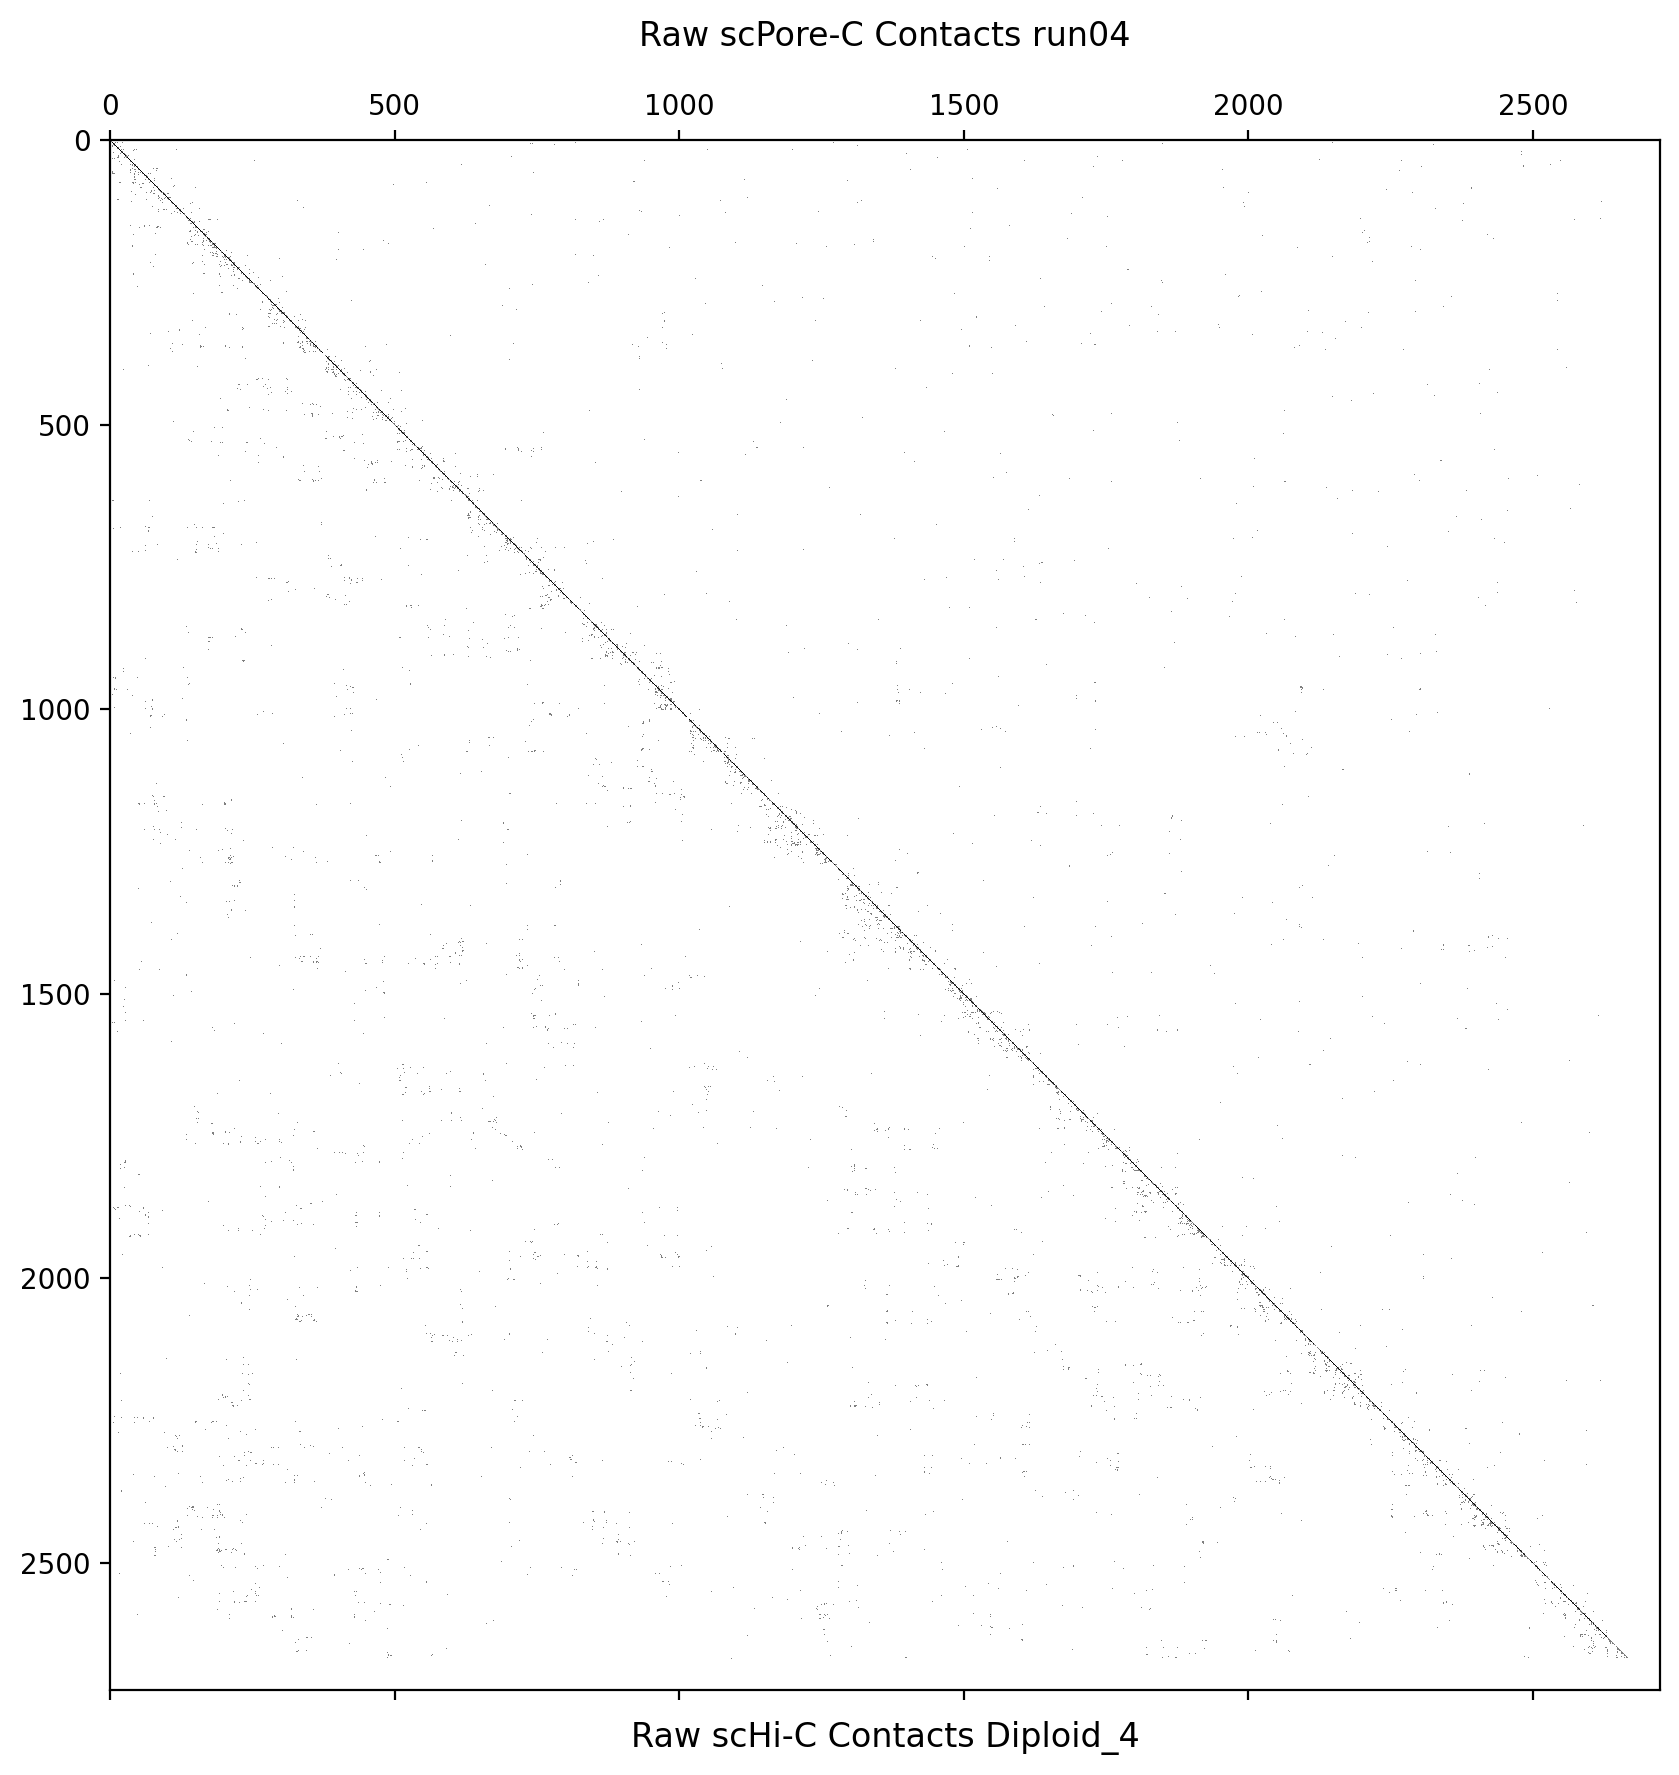

------------------------
pKey='run05'
hKey='Diploid_32'


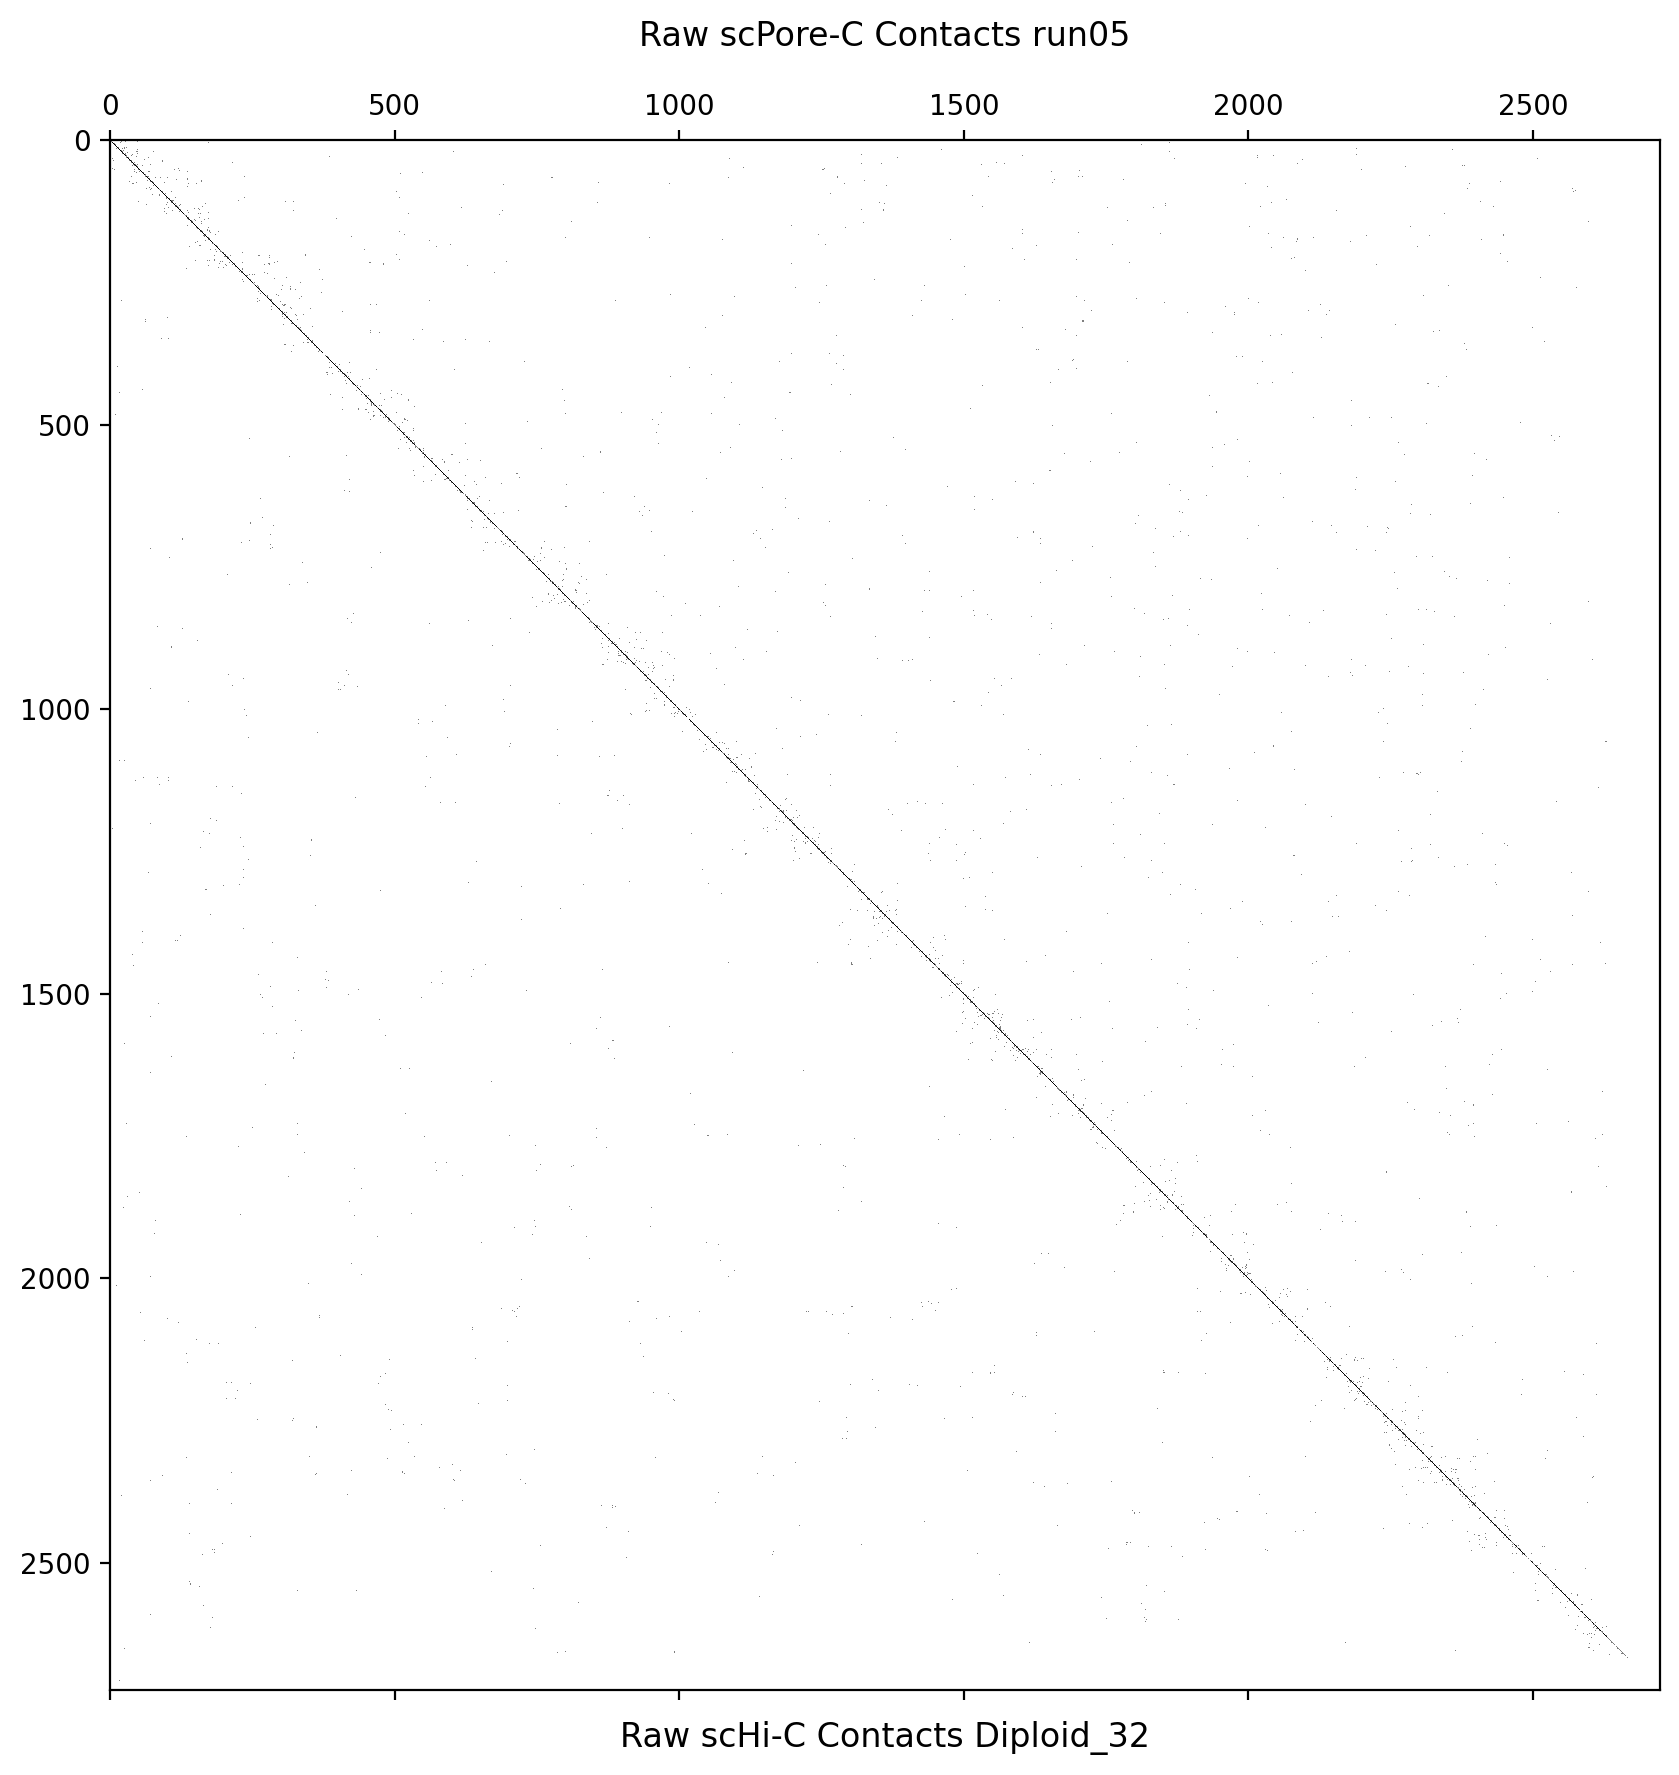

------------------------
pKey='run06'
hKey='Diploid_20'


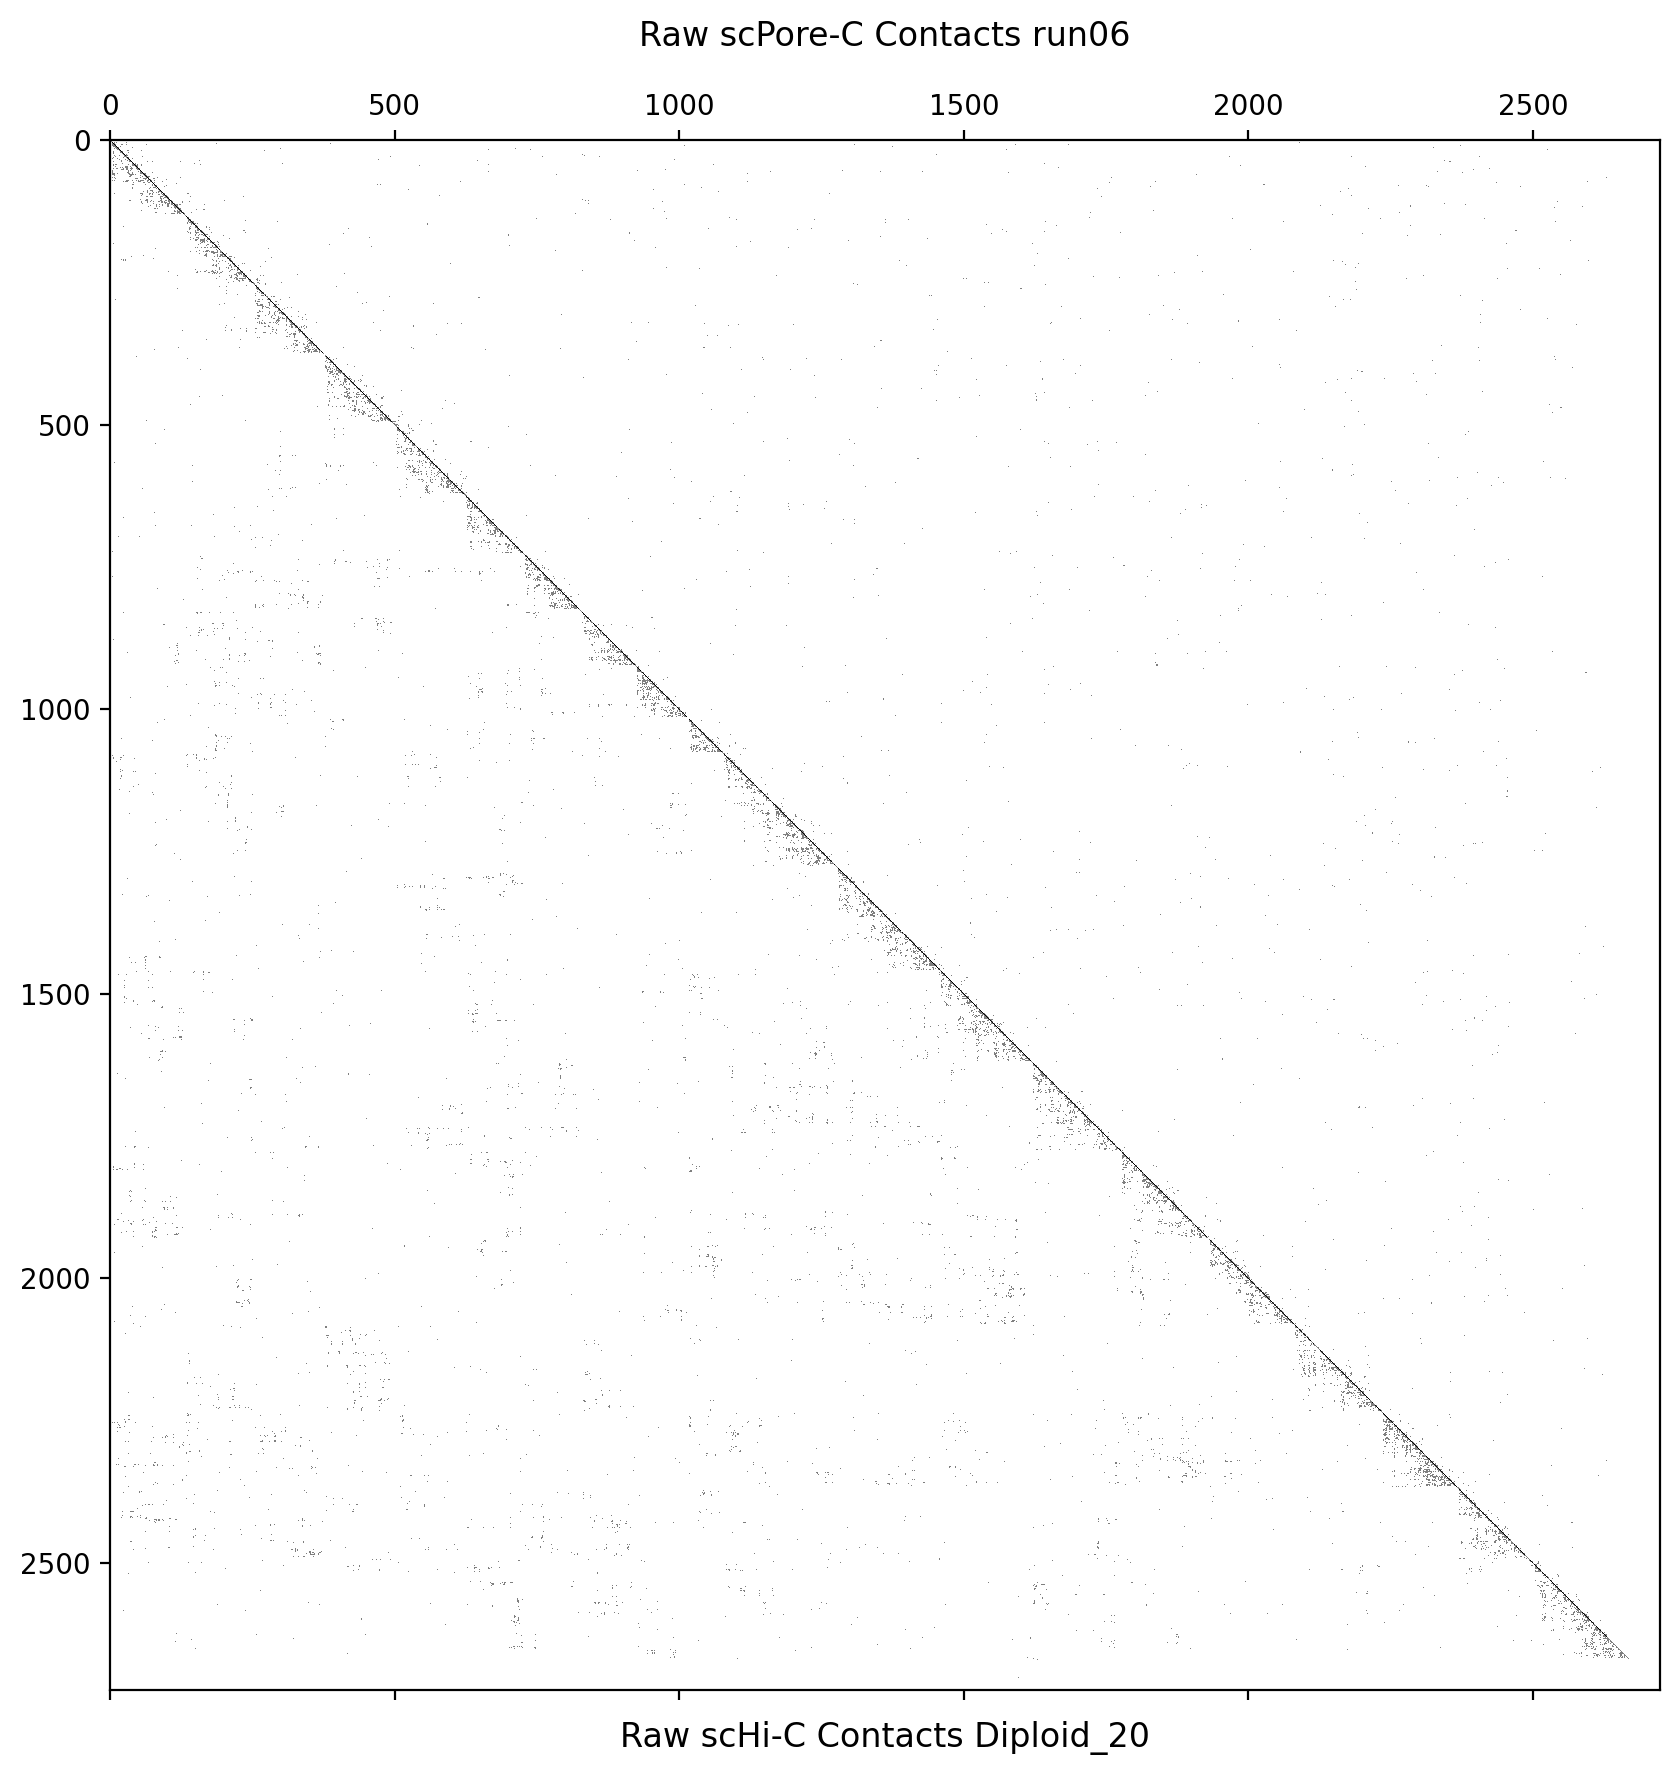

------------------------
pKey='run07'
hKey='Diploid_34'


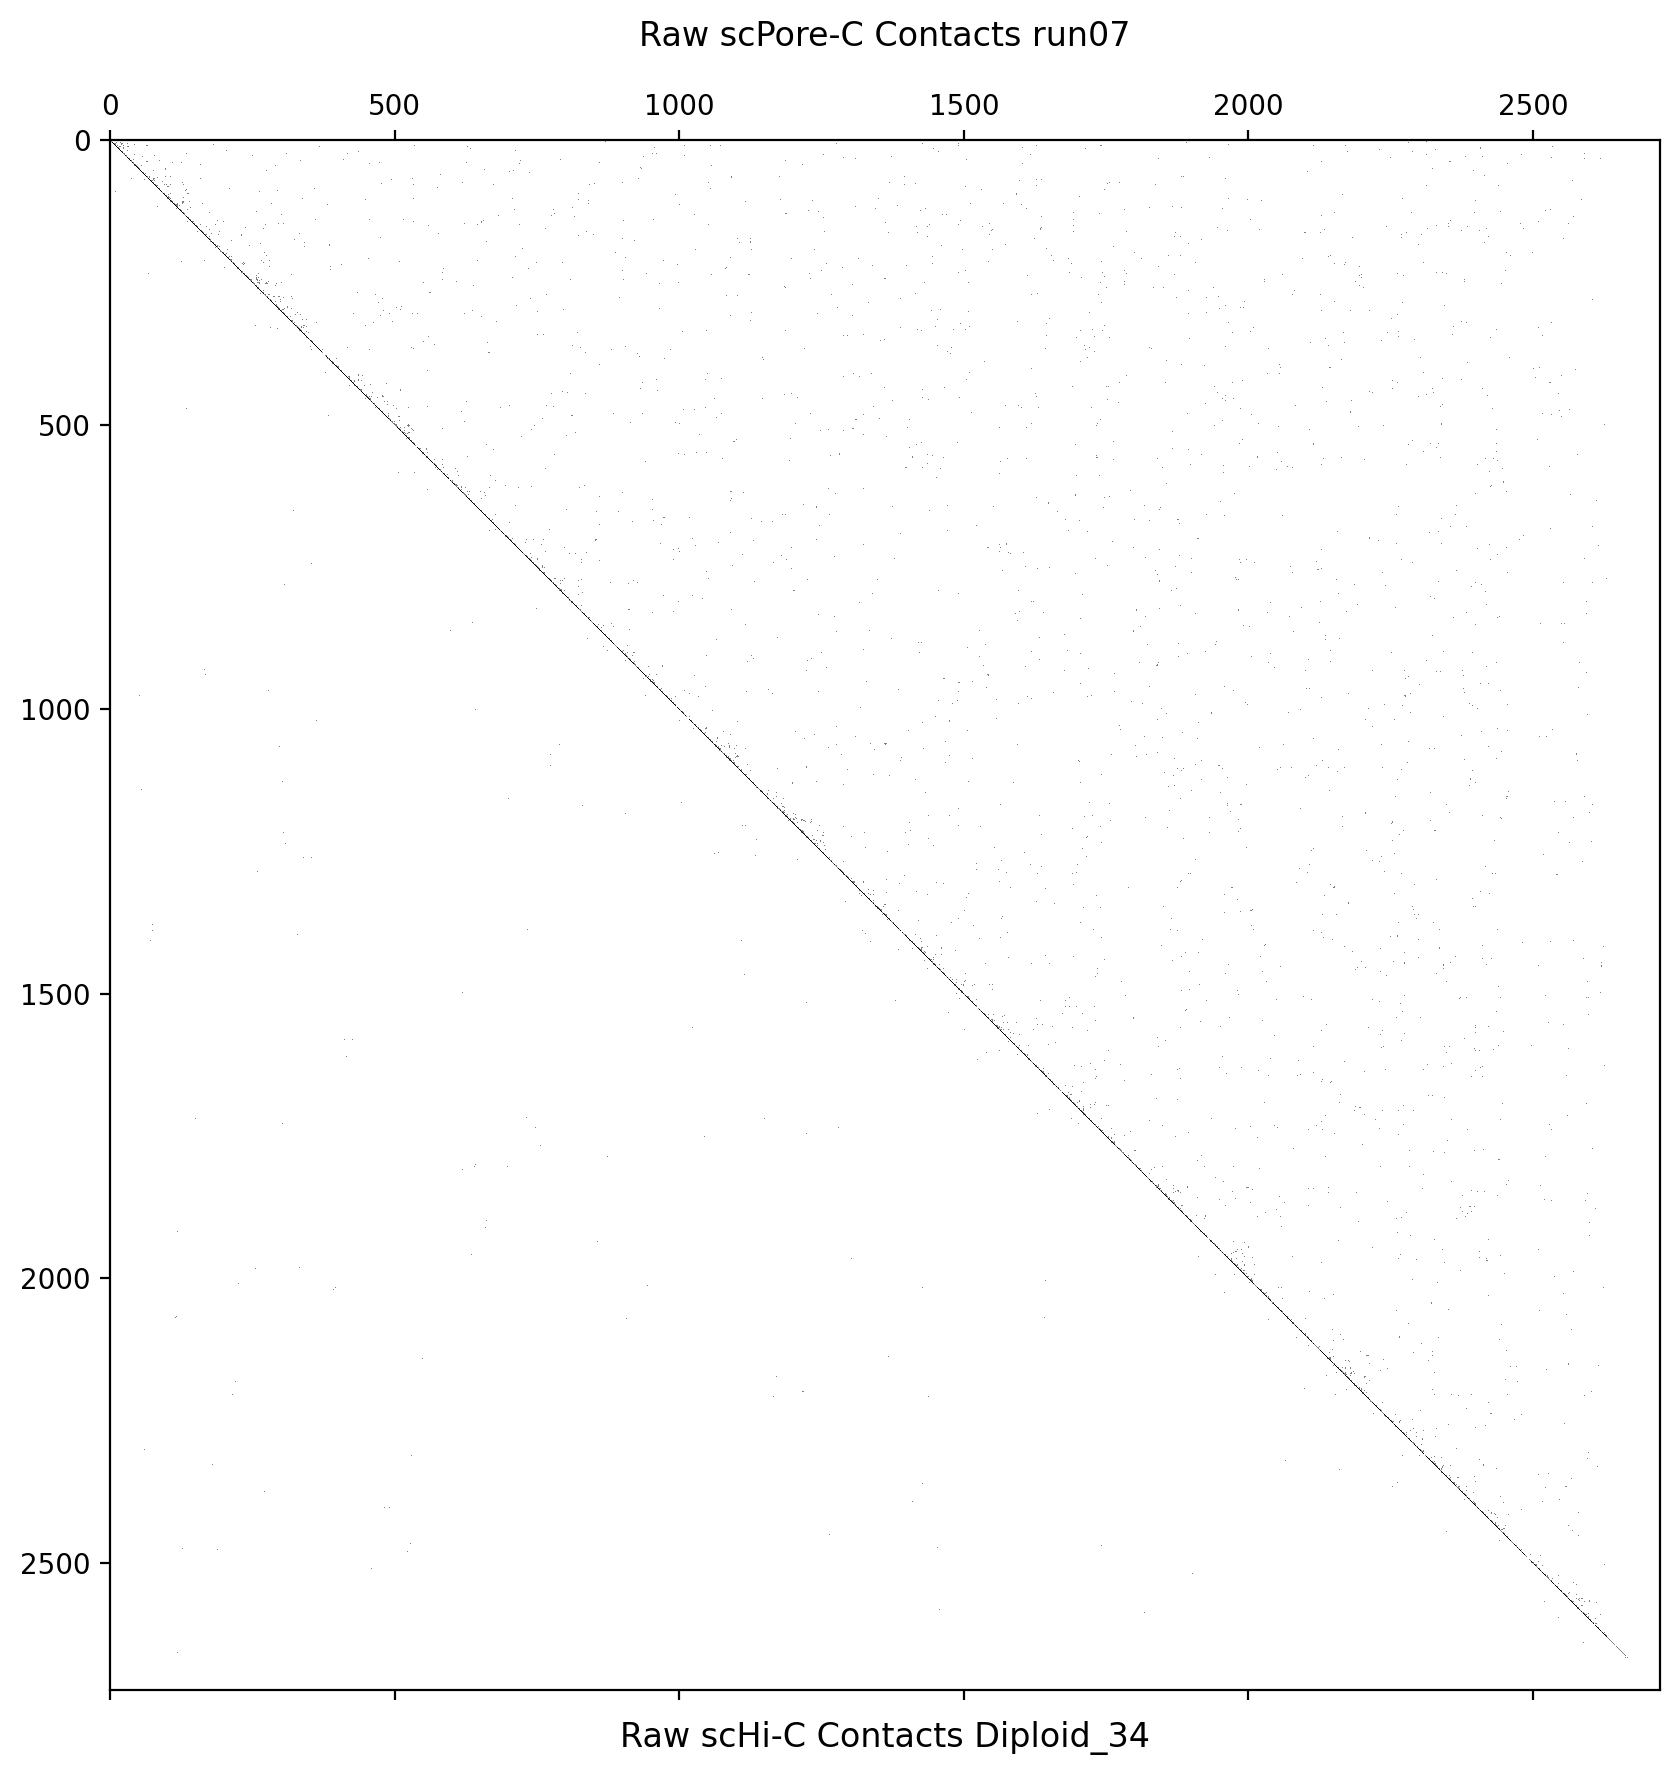

In [11]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 10, 10

zippedKeys = list(zip(matrices.keys(), hiC.keys()))


for pKey, hKey in zippedKeys:
    
    print("------------------------")
    print(f"{pKey=}")
    print(f"{hKey=}")
    pMat = matrices[pKey]
    hMat = hiC[hKey].matrix(balance=True)[:]
    
    # binarize both
    pMatBinary = np.where(pMat > 0, 1, 0)
    hMatBinary = np.where(hMat > 0, 1, 0)
    
    A = np.zeros(pMat.shape)
    
    # truncate the y chrome of the porec data
    n = pMat.shape[0]
    hMatBinary = hMatBinary[0:n, 0:n]
    
    # get upper and lower triangles
    pMatTri = np.triu(pMatBinary)
    hMatTri = np.tril(hMatBinary)

    A += pMatTri
    A += hMatTri
    
    ABinary = np.where(A > 0, 1, 0)
    
    plt.matshow(A, cmap='binary')
    plt.title(f'Raw scPore-C Contacts {pKey}')
    plt.text((n//2), n+100, f"Raw scHi-C Contacts {hKey}", 
             horizontalalignment='center', fontsize=12)
    
    

    plt.show()



In [12]:
# the same for imputed contacts


plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 10, 10

zippedKeys = list(zip(imputedContacts.keys(), hiC.keys()))


for pKey, hKey in zippedKeys:
    
    print("------------------------")
    print(f"{pKey=}")
    print(f"{hKey=}")
    pMat = imputedContacts[pKey]
    hMat = hiC[hKey].matrix(balance=True)[:]
    
    # binarize both
    pMatBinary = np.where(pMat > 0, 1, 0)
    hMatBinary = np.where(hMat > 0, 1, 0)
    
    A = np.zeros(pMat.shape)
    
    # truncate the y chrome of the porec data
    n = pMat.shape[0]
    hMatBinary = hMatBinary[0:n, 0:n]
    
    # get upper and lower triangles
    pMatTri = np.triu(pMatBinary)
    hMatTri = np.tril(hMatBinary)

    A += pMatTri
    A += hMatTri
    
    ABinary = np.where(A > 0, 1, 0)
    
    plt.matshow(A, cmap='binary')
    plt.title(f'Imputed scPore-C Contacts {pKey}')
    plt.text((n//2), n+100, f"Raw scHi-C Contacts {hKey}", 
             horizontalalignment='center', fontsize=12)
    
    

    plt.show()

NameError: name 'imputedContacts' is not defined

In [ ]:
# the same for imputed contacts

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 10, 10

pKey = 'run02'
hKey = 'Diploid_8'

pMat = imputedContacts[pKey]
hMat = hiC[hKey].matrix(balance=True)[:]

# binarize both
pMatBinary = np.where(pMat > 0, 1, 0)
hMatBinary = np.where(hMat > 0, 1, 0)

A = np.zeros(pMat.shape)

# truncate the y chrome of the porec data
n = pMat.shape[0]
hMatBinary = hMatBinary[0:n, 0:n]

# get upper and lower triangles
pMatTri = np.triu(pMatBinary)
hMatTri = np.tril(hMatBinary)

A += pMatTri
A += hMatTri

ABinary = np.where(A > 0, 1, 0)

plt.matshow(A, cmap='binary')
plt.title(f'Imputed scPore-C Contacts {pKey}')
plt.text((n//2), n+100, f"Raw scHi-C Contacts {hKey}", 
         horizontalalignment='center', fontsize=12)



plt.show()